In [1]:
# Import libraries
import sys

sys.path.append("..")

from monai.config import print_config
from src.preprocessing import get_transforms, get_datasets, get_dataloaders

import torch
import matplotlib.pyplot as plt

# Set the device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [2]:
# Get transforms
transform = get_transforms(resize_shape= [512, 512, 48],contrast_value=1000)

# Get datasets
train_ds, val_ds = get_datasets(
    root_dir="../data",
    collection="HCC-TACE-Seg",
    transform=transform,
    download=False,
    val_frac=0.2,
    download_len=2
)

# Get dataloaders
train_loader, val_loader = get_dataloaders(train_ds, val_ds, batch_size=1)

# Check length of datasets and dataloaders
print(train_ds.get_indices(), val_ds.get_indices())
print(len(train_loader), len(val_loader))

[2 1 3 0 5 4] [6]
6 1


In [3]:
# Sample a batch of data from the dataloader
batch = next(iter(train_loader))

# Separate the image and segmentation from the batch
image, seg = batch["image"], batch["seg"]

print(image.shape, seg.shape)

torch.Size([5, 512, 512, 48])
torch.Size([1, 1, 512, 512, 48]) torch.Size([1, 1, 512, 512, 48])


In [4]:
from src.drr import create_drr

# Create DRR
drr = create_drr(
    image[0],
    seg[0],
    bone_attenuation_multiplier=5.0,
    sdd=1020,
    height=200,
    width=200,
    delx=2.0,
    dely=2.0,
    x0=0,
    y0=0,
    p_subsample=None,
    reshape=True,
    reverse_x_axis=True,
    patch_size=None,
    renderer="siddon",
    rotations=torch.tensor([[0.0, 0.0, 0.0]]),
    rotations_degrees=True,
    translations=torch.tensor([[0.0, 850.0, 0.0]]),
    mask_to_channels=False,
    device="cpu",
)

print(drr.shape)

torch.Size([1, 1, 200, 200])


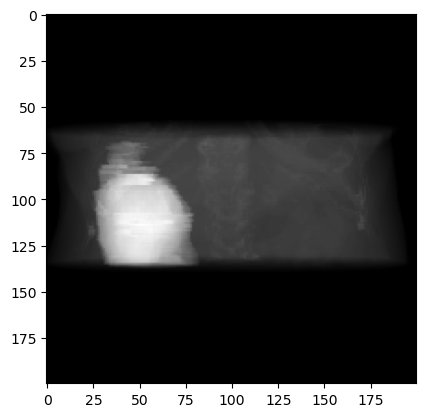

In [5]:
# Plot the DRR
plt.imshow(drr[0, 0], cmap="gray")

TypeError: Invalid shape (512, 512, 48) for image data

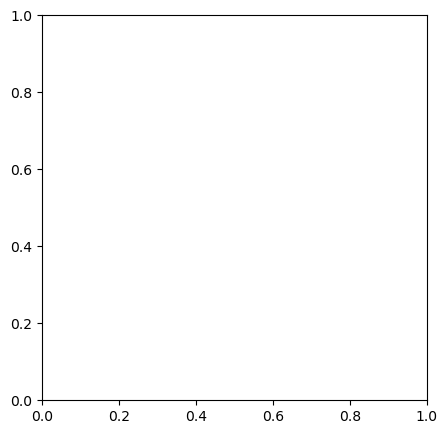

In [6]:
from diffdrr.visualization import plot_drr, plot_mask

im = image.sum(dim=1, keepdim=True)
drr_image = plot_drr(im, ticks=False)